<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-TEAM17/Kaggle-Challenge-Team-17/blob/main/kaggle_Challenge_TEAM_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Suc

In [2]:
#library files

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import pandas as pd

In [3]:
#using dataset from our GitHub organisation
data_url = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-TEAM17/Kaggle-Challenge-Team-17/main/train.csv'
train_df = pd.read_csv(data_url)

# **DATASET information:**

In [4]:
#reading first few rows of dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.shape #analysing the shape of the dataset

(8693, 14)

In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# **DataSet Pre-Processing**

# Checking Duplicate Rows

In [8]:
duplicate_rows = train_df[train_df.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate rows in train_df:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in train_df.")

No duplicate rows found in train_df.


## Checking NULL values

In [9]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Eliminating NULL values

In [10]:
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)

In [11]:
train_df['RoomService'].fillna(train_df['RoomService'].median(), inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].median(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].median(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].median(), inplace=True)
train_df.drop(columns=[ 'Name'], inplace=True)

In [12]:
print("Remaining null values in train_df:")
print(train_df.isnull().sum())

Remaining null values in train_df:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [13]:
train_df.describe() #again checking the statistical data after eradicating missing values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Exploratory Data Analysis


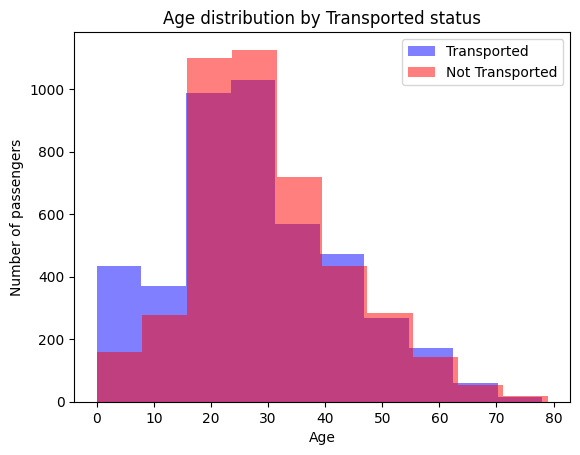

In [22]:
import matplotlib.pyplot as plt

# Filter data for passengers who were transported and those who were not
transported_passengers = train_df[train_df['Transported'] == True]
not_transported_passengers = train_df[train_df['Transported'] == False]

# Plot histogram for transported passengers
plt.hist(transported_passengers['Age'], alpha=0.5, label='Transported', color='blue')

# Plot histogram for not transported passengers
plt.hist(not_transported_passengers['Age'], alpha=0.5, label='Not Transported', color='red')


plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution by Transported status')
_ = plt.legend()


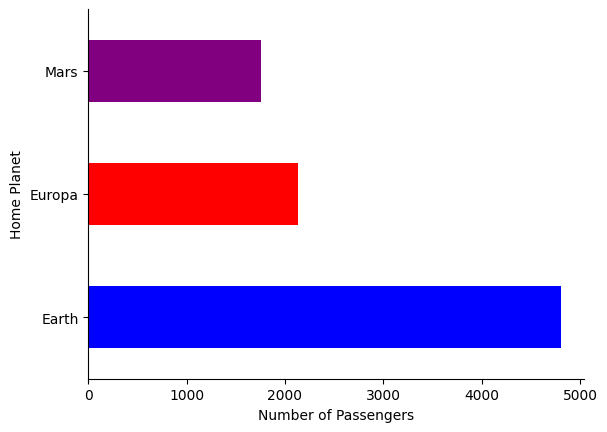

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define custom palette with blue, red, and purple colors
custom_palette = sns.color_palette(['blue', 'red', 'purple'])

# Plot Bar Chart for each home planet according to Number of Passengers
train_df.groupby('HomePlanet').size().plot(kind='barh', color=custom_palette)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Number of Passengers')
plt.ylabel('Home Planet')
plt.show()


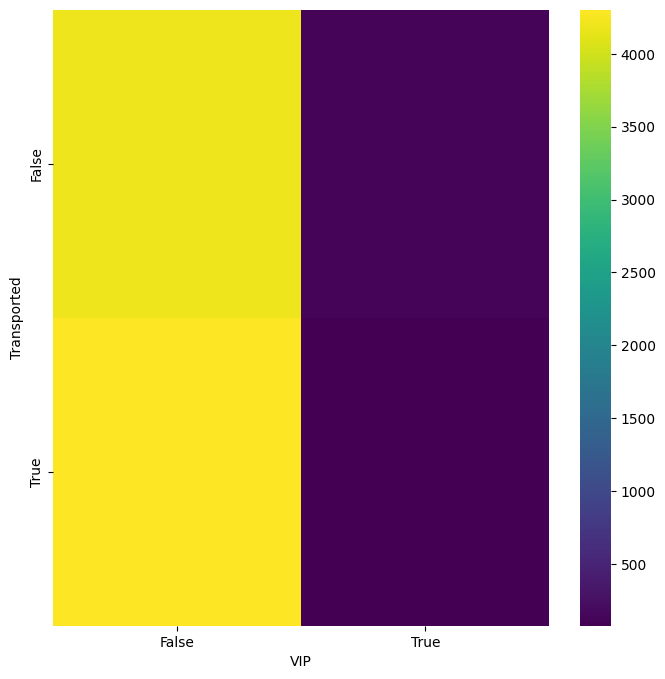

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(8, 8))

# Create a DataFrame for 2D histogram
# This DataFrame contains the count of 'Transported' values for each 'VIP' group
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in train_df.groupby('VIP')
})

# Create a heatmap using seaborn
sns.heatmap(df_2dhist, cmap='viridis')


plt.xlabel('VIP')
plt.ylabel('Transported')
_ = plt.show()


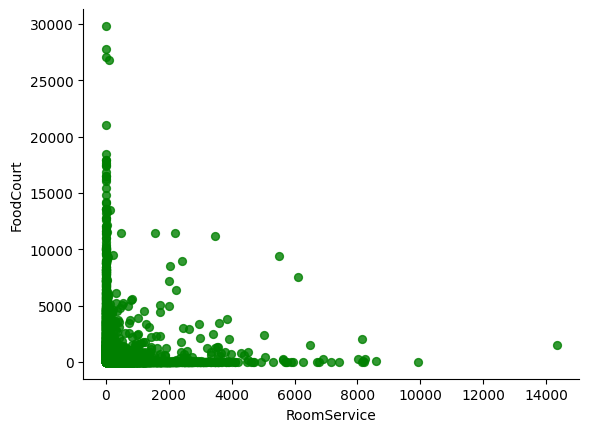

In [32]:
from matplotlib import pyplot as plt

# Plot a scatter plot
# 'RoomService' is plotted on the x-axis and 'FoodCourt' on the y-axis
train_df.plot(kind='scatter', x='RoomService', y='FoodCourt', s=32, alpha=.8, color='green')


plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


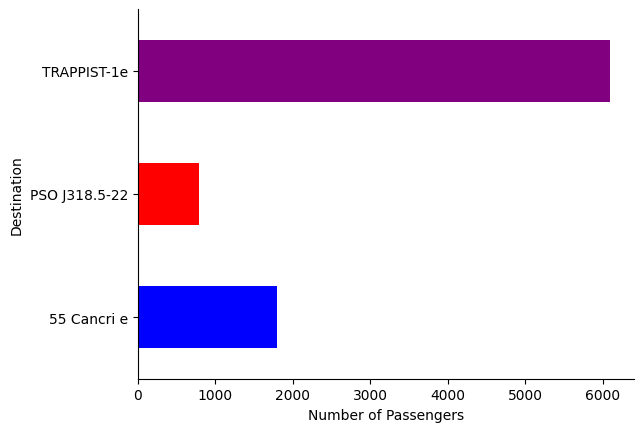

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot horizontal bar chart for each destination with the specified colors
train_df.groupby('Destination').size().plot(kind='barh', color=['blue', 'red', 'purple'])


plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Passengers')
plt.ylabel('Destination')
plt.show()


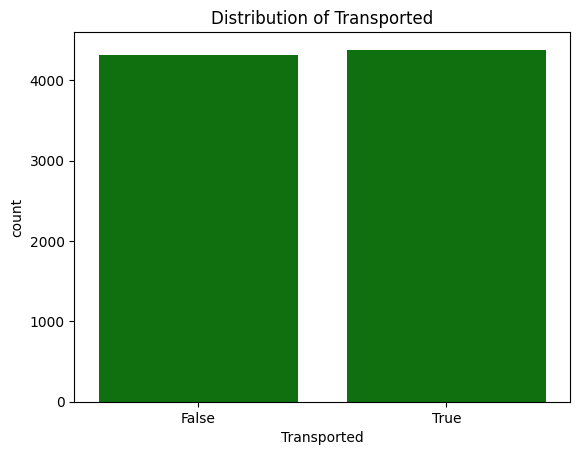

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot a count plot to show the distribution of 'Transported'
sns.countplot(x='Transported', data=train_df, color='green')

plt.title('Distribution of Transported')
plt.show()
